In [ ]:
import import_ipynb
%run 03-EDA.ipynb


### Imports

In [9]:
import math
import numpy as np
import pandas as pd
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error , mean_absolute_percentage_error , mean_squared_error , accuracy_score
from sklearn.metrics import accuracy_score, classification_report,ConfusionMatrixDisplay, precision_score, recall_score
from sklearn.metrics import f1_score, roc_auc_score, roc_curve, confusion_matrix
from sklearn.metrics import log_loss
from sklearn.metrics import make_scorer
from sklearn.tree import DecisionTreeClassifier



import statsmodels.api as sm

<a id="6"></a>
# <div style="padding:20px;color:white;margin:0;color:darkgreen;font-size:30px;font-family:Georgia;text-align:left;display:fill;border-radius:5px;background-color:#f2ffe6;overflow:hidden">6. | Model Development: CDC Data: Decision Tree</div>

### Selected Features

In [4]:
selected_features_cdc_data = ['HighBP', 'HighChol', 'BMI', 'PhysActivity', 'GenHlth', 'MentHlth', 'PhysHlth', 'DiffWalk',  'Age', 'Education' ,'Income']

<a id="6.1"></a>
# <div style="padding:20px;color:white;margin:0;color:darkcyan;font-size:20px;font-family:Georgia;text-align:left;display:fill;border-radius:5px;background-color:#E0FFFF;overflow:hidden">6.1 | Model Development: CDC Data: Decision Tree: First Iteration</div>

### Split Features and Target

In [5]:
X = cdc_data[selected_features_cdc_data]
y = cdc_data['Diabetes_binary']

### Split Train and Test Dataset

In [6]:
X_train,X_test,y_train,y_test=  train_test_split(X,y,test_size=0.2,random_state=42)
print(X_train.shape,y_train.shape)
print(X_test.shape,y_test.shape)

(202944, 11) (202944,)
(50736, 11) (50736,)


#### Train with Decision Tree

In [7]:
model_dt = DecisionTreeClassifier()
model_dt.fit(X_train, y_train)

DecisionTreeClassifier()

### Predict Using Decision Tree

In [8]:

predictions_train_dt = model_dt.predict(X_train)
predictions_test_dt  = model_dt.predict(X_test)

### Decision Tree: Significant Variables

         Feature  Importance
2            BMI    0.174023
10        Income    0.129747
8            Age    0.122048
6       PhysHlth    0.122015
9      Education    0.104896
5       MentHlth    0.092320
0         HighBP    0.079807
4        GenHlth    0.077856
3   PhysActivity    0.046028
7       DiffWalk    0.032981
1       HighChol    0.018280


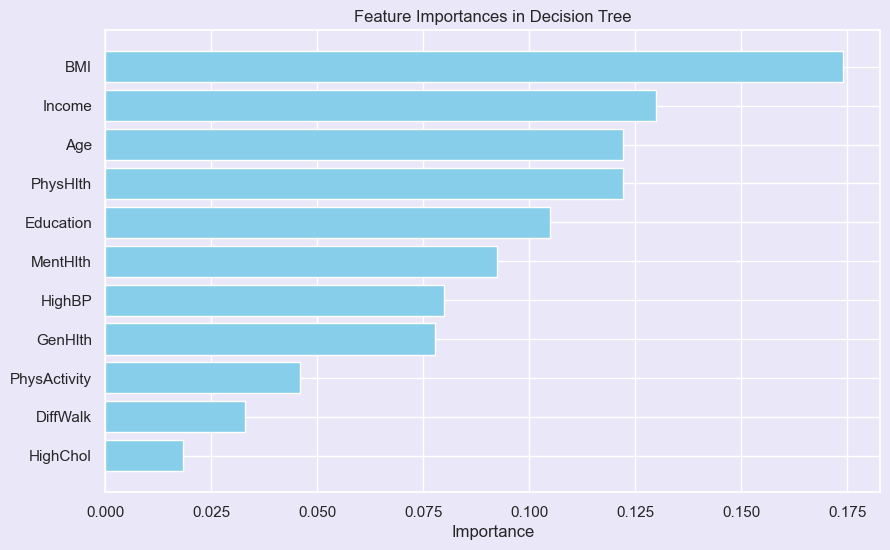

In [10]:
# Extract feature importances
feature_importances = model_dt.feature_importances_

# Get feature names (assuming X is a DataFrame)
feature_names = X.columns

# Create a DataFrame for visualization
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Print the sorted feature importances
print(importance_df)

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.title('Feature Importances in Decision Tree')
plt.gca().invert_yaxis()  # Invert y-axis to show the most important feature on top
plt.show()

### DT: Feature Importance and Interpretation

Key Influencers: 

BMI, Income, Age, and PhysHlth are identified as the most influential features, 

indicating that these factors are critical in the decision-making process of the model.

#### Plot Confusion Matrix For Decision Tree

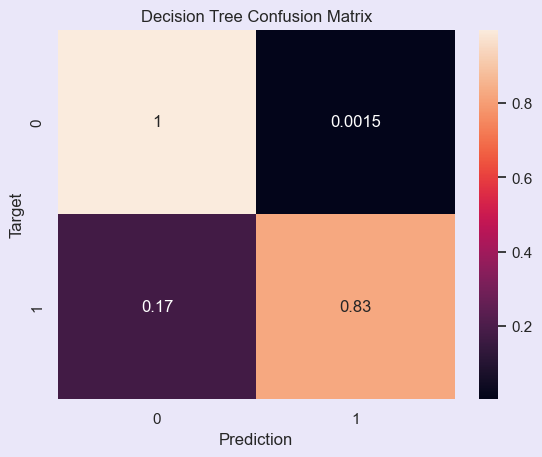

In [11]:
cf_dt = confusion_matrix(y_train, predictions_train_dt, normalize='true')
plt.figure()
sns.heatmap(cf_dt, annot=True)
plt.xlabel('Prediction')
plt.ylabel('Target')
plt.title('{} Confusion Matrix'.format("Decision Tree"))
plt.show()

#### Calculate Evaluation Metrics for Decision Tree

In [12]:
# Training set performance
dt_train_accuracy = accuracy_score(y_train, predictions_train_dt) # Calculate Accuracy
dt_train_f1 = f1_score(y_train, predictions_train_dt) # Calculate F1-score
dt_train_precision = precision_score(y_train, predictions_train_dt) # Calculate Precision
dt_train_recall = recall_score(y_train, predictions_train_dt) # Calculate Recall
dt_train_rocauc_score = roc_auc_score(y_train, predictions_train_dt)
dt_train_log_loss_value = log_loss(y_train, predictions_train_dt)


# Test set performance
dt_test_accuracy = accuracy_score(y_test, predictions_test_dt) # Calculate Accuracy
dt_test_f1 = f1_score(y_test, predictions_test_dt) # Calculate F1-score
dt_test_precision = precision_score(y_test, predictions_test_dt) # Calculate Precision
dt_test_recall = recall_score(y_test, predictions_test_dt) # Calculate Recall
dt_test_rocauc_score = roc_auc_score(y_test, predictions_test_dt) #Calculate Roc
dt_test_log_loss_value = log_loss(y_test, predictions_test_dt)

print('DT: Model performance for Training set')
print("- Accuracy: {:.4f}".format(dt_train_accuracy))
print('- F1 score: {:.4f}'.format(dt_train_f1))
print('- Precision: {:.4f}'.format(dt_train_precision))
print('- Recall: {:.4f}'.format(dt_train_recall))
print('- Roc Auc Score: {:.4f}'.format(dt_train_rocauc_score))
print('- Log Loss: {:.4f}'.format(dt_train_log_loss_value))

    
    
print('----------------------------------')
    
print('DT: Model performance for Test set')
print('- Accuracy: {:.4f}'.format(dt_test_accuracy))
print('- F1 score: {:.4f}'.format(  dt_test_f1))
print('- Precision: {:.4f}'.format(dt_test_precision))
print('- Recall: {:.4f}'.format(dt_test_recall))
print('- Roc Auc Score: {:.4f}'.format(dt_test_rocauc_score))
print('- Log Loss: {:.4f}'.format(dt_test_log_loss_value))

    
print('='*35)
print('\n')

DT: Model performance for Training set
- Accuracy: 0.9746
- F1 score: 0.9008
- Precision: 0.9890
- Recall: 0.8271
- Roc Auc Score: 0.9128
- Log Loss: 0.9170
----------------------------------
DT: Model performance for Test set
- Accuracy: 0.8113
- F1 score: 0.3011
- Precision: 0.3078
- Recall: 0.2947
- Roc Auc Score: 0.5943
- Log Loss: 6.8008




#### DT: Classification Report


In [14]:
cm_dt_train = classification_report(y_train,predictions_train_dt)

print('Decision Tree Model: Train\n')
print(cm_dt_train)

cm_dt_test = classification_report(y_test,predictions_test_dt)

print('Decision Tree Model: Test\n')
print(cm_dt_test)

Decision Tree Model: Train

              precision    recall  f1-score   support

         0.0       0.97      1.00      0.99    174595
         1.0       0.99      0.83      0.90     28349

    accuracy                           0.97    202944
   macro avg       0.98      0.91      0.94    202944
weighted avg       0.97      0.97      0.97    202944

Decision Tree Model: Test

              precision    recall  f1-score   support

         0.0       0.89      0.89      0.89     43739
         1.0       0.31      0.29      0.30      6997

    accuracy                           0.81     50736
   macro avg       0.60      0.59      0.60     50736
weighted avg       0.81      0.81      0.81     50736



#### DT: N-fold cross-validation

In [15]:
n_splits = 5

skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)

X = cdc_data[selected_features_cdc_data]
y = cdc_data['Diabetes_binary']

model_dt = DecisionTreeClassifier()

# Arrays to store accuracy scores
training_accuracies = []
testing_accuracies = []

# Arrays to store f1 scores
training_f1 = []
testing_f1 = []

# Arrays to store Precision scores
training_precision = []
testing_precision = []

# Arrays to store Recall scores
training_recall = []
testing_recall = []

# Arrays to store RO-AUC scores
training_rocauc_score = []
testing_rocauc_score = []

# Arrays to store Log Loss scores
training_log_loss_value = []
testing_log_loss_value = []

# Perform cross-validation
for train_index, test_index in skf.split(X, y):
    # Split the data into training and test sets for this fold
    X_train_kfold, X_test_kfold = X.iloc[train_index], X.iloc[test_index]
    y_train_kfold, y_test_kfold = y.iloc[train_index], y.iloc[test_index]
    
    # Train the model
    model_dt.fit(X_train_kfold, y_train_kfold)
    
    # Predict on training and test data
    pred_train_dt_kfold = model_dt.predict(X_train_kfold)
    pred_test_dt_kfold = model_dt.predict(X_test_kfold)
    
    # Calculate accuracy
    train_accuracy = accuracy_score(y_train_kfold, pred_train_dt_kfold)
    test_accuracy = accuracy_score(y_test_kfold, pred_test_dt_kfold)
    
    # Store the accuracy scores
    training_accuracies.append(train_accuracy)
    testing_accuracies.append(test_accuracy)

    # Calculate f1
    train_f1 = f1_score(y_train_kfold, pred_train_dt_kfold)
    test_f1 = f1_score(y_test_kfold, pred_test_dt_kfold)
    
    # Store the f1 scores
    training_f1.append(train_f1)
    testing_f1.append(test_f1)

    # Calculate Precision
    train_precision_score = precision_score(y_train_kfold, pred_train_dt_kfold)
    test_precision_score = precision_score(y_test_kfold, pred_test_dt_kfold)
    
    # Store the Precision scores
    training_precision.append(train_precision_score)
    testing_precision.append(test_precision_score)

    # Calculate recall
    train_recall_score = recall_score(y_train_kfold, pred_train_dt_kfold)
    test_recall_score = recall_score(y_test_kfold, pred_test_dt_kfold)
    
    # Store the recall scores
    training_recall.append(train_recall_score)
    testing_recall.append(test_recall_score)

    # Calculate RO-AUC
    train_roc_auc_score = roc_auc_score(y_train_kfold, pred_train_dt_kfold)
    test_roc_auc_score = roc_auc_score(y_test_kfold, pred_test_dt_kfold)
    
    # Store the RO-AUC scores
    training_rocauc_score.append(train_roc_auc_score)
    testing_rocauc_score.append(test_roc_auc_score)

    # Calculate Log Loss
    train_log_loss = log_loss(y_train_kfold, pred_train_dt_kfold)
    test_log_loss = log_loss(y_test_kfold, pred_test_dt_kfold)
    
    # Store the Log Loss
    training_log_loss_value.append(train_log_loss)
    testing_log_loss_value.append(test_log_loss)


# Calculate mean and standard deviation of accuracies
mean_train_accuracy = np.mean(training_accuracies)
std_train_accuracy = np.std(training_accuracies)
mean_test_accuracy = np.mean(testing_accuracies)
std_test_accuracy = np.std(testing_accuracies)

# Print results
print("\n")
print("="*50)
print(f"Training Accuracy: {mean_train_accuracy:.2f} ± {std_train_accuracy:.2f}")
print(f"Test Accuracy: {mean_test_accuracy:.2f} ± {std_test_accuracy:.2f}")
print("="*50)

# Calculate mean and standard deviation of f1 scores

mean_train_f1 = np.mean(training_f1)
std_train_f1 = np.std(training_f1)
mean_test_f1 = np.mean(testing_f1)
std_test_f1 = np.std(testing_f1)

# Print results
print("\n")
print("="*50)
print(f"Training F1: {mean_train_f1:.2f} ± {std_train_f1:.2f}")
print(f"Test F1: {mean_test_f1:.2f} ± {std_test_f1:.2f}")
print("="*50)

# Calculate mean and standard deviation of Precision scores

mean_train_precision = np.mean(training_precision)
std_train_precision = np.std(training_precision)
mean_test_precision = np.mean(testing_precision)
std_test_precision = np.std(testing_precision)

# Print results
print("\n")
print("="*50)
print(f"Training Precision: {mean_train_precision:.2f} ± {std_train_precision:.2f}")
print(f"Test Precision: {mean_test_precision:.2f} ± {std_test_precision:.2f}")
print("="*50)

# Calculate mean and standard deviation of Recall scores

mean_train_recall = np.mean(training_recall)
std_train_recall = np.std(training_recall)
mean_test_recall = np.mean(testing_recall)
std_test_recall = np.std(testing_recall)

# Print results
print("\n")
print("="*50)
print(f"Training Recall: {mean_train_recall:.2f} ± {std_train_recall:.2f}")
print(f"Test Recall: {mean_test_recall:.2f} ± {std_test_recall:.2f}")
print("="*50)

# Calculate mean and standard deviation of RO-AUC scores

mean_train_rocauc_score = np.mean(training_rocauc_score)
std_train_rocauc_score = np.std(training_rocauc_score)
mean_test_rocauc_score = np.mean(testing_rocauc_score)
std_test_rocauc_score = np.std(testing_rocauc_score)

# Print results
print("\n")
print("="*50)
print(f"Training RO-AUC: {mean_train_rocauc_score:.2f} ± {std_train_rocauc_score:.2f}")
print(f"Test RO-AUC: {mean_test_rocauc_score:.2f} ± {std_test_rocauc_score:.2f}")
print("="*50)

# Calculate mean and standard deviation of Log Loss scores

mean_train_log_loss_value = np.mean(training_log_loss_value)
std_train_log_loss_value = np.std(training_log_loss_value)
mean_test_log_loss_value = np.mean(testing_log_loss_value)
std_test_log_loss_value = np.std(testing_log_loss_value)

# Print results
print("\n")
print("="*50)
print(f"Training Log Loss: {mean_train_log_loss_value:.2f} ± {std_train_log_loss_value:.2f}")
print(f"Test Log Loss: {mean_test_log_loss_value:.2f} ± {std_test_log_loss_value:.2f}")
print("="*50)





Training Accuracy: 0.97 ± 0.00
Test Accuracy: 0.81 ± 0.00


Training F1: 0.90 ± 0.00
Test F1: 0.30 ± 0.01


Training Precision: 0.99 ± 0.00
Test Precision: 0.31 ± 0.00


Training Recall: 0.83 ± 0.00
Test Recall: 0.29 ± 0.01


Training RO-AUC: 0.91 ± 0.00
Test RO-AUC: 0.59 ± 0.00


Training Log Loss: 0.92 ± 0.01
Test Log Loss: 6.81 ± 0.04


<a id="6.1"></a>
# <div style="padding:20px;color:white;margin:0;color:darkcyan;font-size:20px;font-family:Georgia;text-align:left;display:fill;border-radius:5px;background-color:#E0FFFF;overflow:hidden">6.1 | Model Development: CDC Data: Decision Tree: First Iteration: Conclusions</div>

<div style="background-color:white;font-size:15px;font-family:Georgia;border-style: solid;border-color: #254E58;border-width:3px;padding:10px;margin: 1px;color:#254E58;overflow:hidden"> <b>Evaluate: Logistic Regression Model</b><br>


Training Accuracy: 0.97 ± 0.00  : Test Accuracy: 0.81 ± 0.00

Training F1: 0.90 ± 0.00 : Test F1: 0.30 ± 0.01

Training Precision: 0.99 ± 0.00 : Test Precision: 0.31 ± 0.00

Training Recall: 0.83 ± 0.00 : Test Recall: 0.29 ± 0.01

Training RO-AUC: 0.91 ± 0.00 : Test RO-AUC: 0.59 ± 0.00

Training Log Loss: 0.92 ± 0.01 : Test Log Loss: 6.81 ± 0.04
</div>

<div style="background-color:white;font-size:15px;font-family:Georgia;border-style: solid;border-color: #254E58;border-width:3px;padding:10px;margin: 1px;color:#254E58;overflow:hidden">

<b>Overall Conclusions:</b>
  
Overfitting: 

The model is likely overfitting to the training data, 

capturing noise and specifics that do not generalize to new data. 

This is evidenced by the large disparity between training and test metrics.


Complexity: 

The decision tree may be too complex, with too many branches that fit the training data closely but fail to generalize.


Need for Regularization: Consider using techniques such as pruning the tree, limiting its depth, 

or using ensemble methods like Random Forests or Gradient Boosting to improve generalization.


Data and Feature Review: 

Re-evaluate the features and data used for training. Simplifying the model or adding more data might help improve generalization.


Cross-Validation: 

Ensure robust cross-validation techniques are used to better estimate generalization performance.

</div>



<a id="6"></a>
# <div style="padding:20px;color:white;margin:0;color:darkcyan;font-size:20px;font-family:Georgia;text-align:left;display:fill;border-radius:5px;background-color:#F88379;overflow:hidden">6 | Model Development: CDC Data: Decision Tree: Not Suitable </div>


While decision tree is simple and interpretable, they are having the overfitting problem with this large dataset. 


Ensemble methods like Random Forests and Gradient Boosting leverage the strengths of multiple trees to produce models that are more accurate, robust, and might generalize better to new data. 

So to use the ensemble methods instead of the Decision tree model for further evaluations